In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from utils import *

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## Hounsield Units

In [49]:
def show_slice_window(slice, level, window):
   """
   Function to display an image slice
   Input is a numpy 2D array
   """
   max = level + window/2
   min = level - window/2
   slice = slice.clip(min,max)

   fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
  #  plt.figure()
   ax[0].imshow(slice, cmap="gray")

   retval, thresh_gray = cv2.threshold(slice, thresh=50, maxval=255, type=cv2.THRESH_BINARY)
   ax[1].imshow(thresh_gray, cmap='gray', vmin=0, vmax=255)
   return thresh_gray

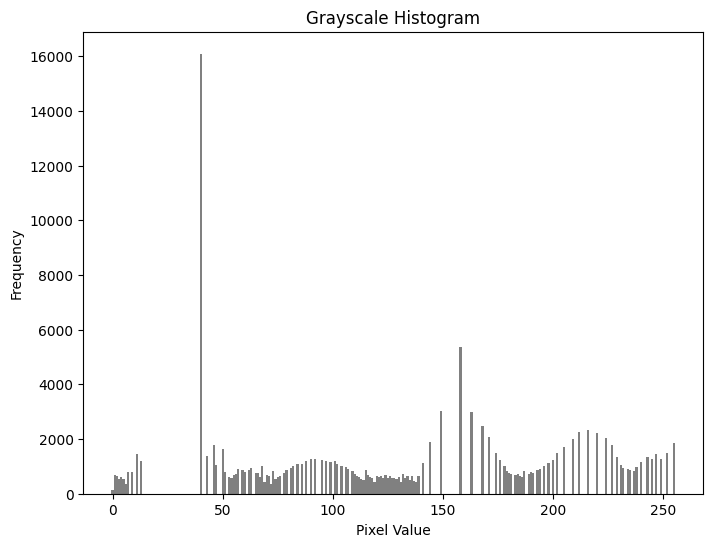

In [43]:
img_N = cv2.imread("/content/drive/MyDrive/W281/FinalProject/Data_Resized/train/normal/n9.jpg", cv2.IMREAD_GRAYSCALE)
img_N = cv2.equalizeHist(img_N)

# Calculate the histogram
hist, bins = np.histogram(img_N.flatten(), 256, [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(bins[:-1], hist, width=1, color='gray')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

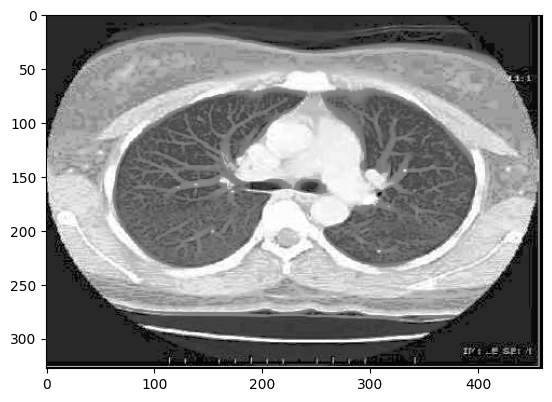

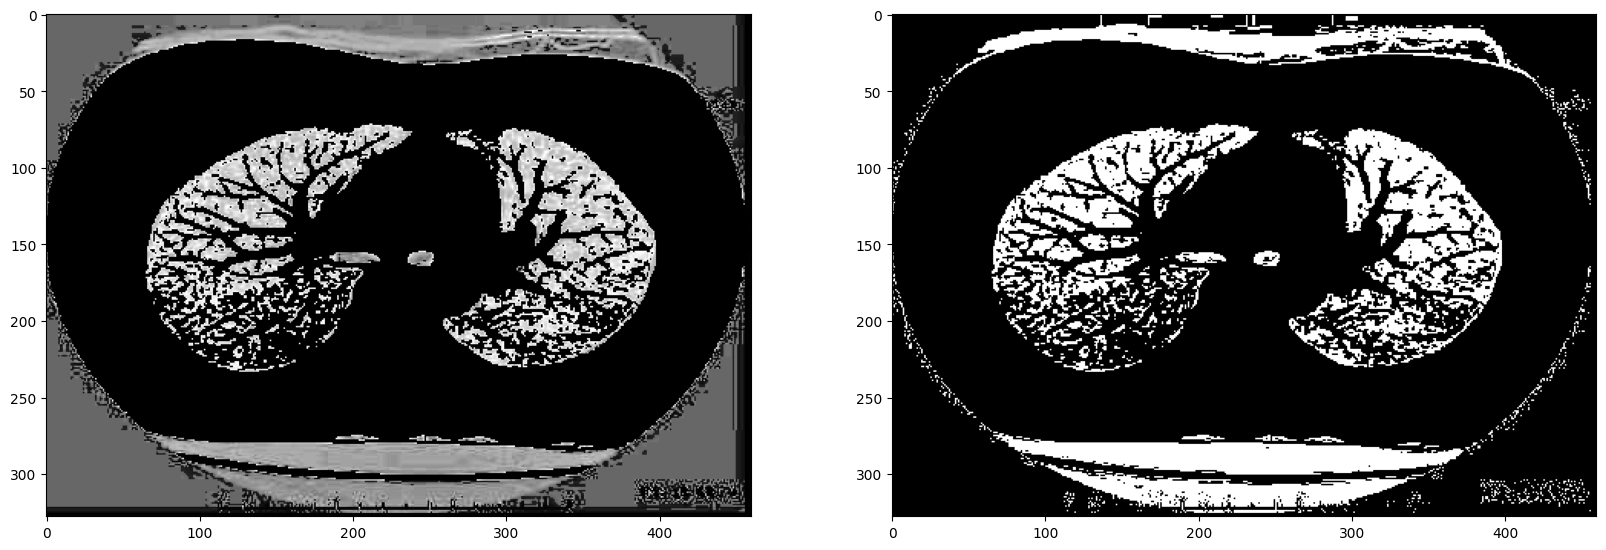

In [62]:
img_N_thresholded = img_N.copy()
img_N_thresholded[img_N_thresholded > 100] = 0

plt.imshow(img_N, cmap = "gray")
gray = show_slice_window(img_N_thresholded, -600, 1500)


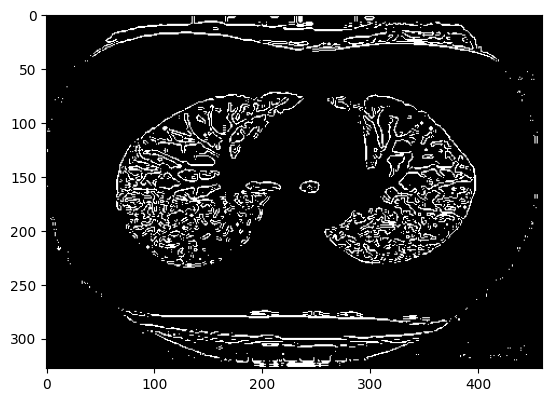

In [58]:
edges = detect_edges_sobel(gray, threshold = 200)
plt.imshow(edges, cmap = "gray")

In [99]:
def apply_hough_transform(img, param1=100, param2=30, minRadius=0, maxRadius=30):
  rows = img.shape[0]
  ### Parameters:
  # gray: Input image (grayscale).
  # circles: A vector that stores sets of 3 values: xc,yc,r for each detected circle.
  # HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV.
  # dp = 1: The inverse ratio of resolution.
  # min_dist = gray.rows/16: Minimum distance between detected centers.
  # param_1 = 200: Upper threshold for the internal Canny edge detector.
  # param_2 = 100*: Threshold for center detection.
  # min_radius = 0: Minimum radius to be detected. If unknown, put zero as default.
  # max_radius = 0: Maximum radius to be detected. If unknown, put zero as default.
  circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, rows / 8,
    param1=100, param2=30, minRadius=0, maxRadius=30)

  img_circles = img.copy()
  if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
      center = (i[0], i[1])
      # circle center
      # cv2.circle(img_circles, center, 1, (0, 100, 100), 3)
      # circle outline
      radius = i[2]
      cv2.circle(img_circles, center, radius, (0, 0, 255), 3)

  return img_circles

def blob_detection(image):
    # Initialize the SimpleBlobDetector parameters
    params = cv2.SimpleBlobDetector_Params()

    # Change parameters as needed
    params.minThreshold = 0
    params.maxThreshold = 200

    params.filterByArea = True
    params.minArea = 500
    # params.maxArea = 2000

    params.filterByCircularity = False
    params.minCircularity = 0.1;
    params.maxCircularity = 1e37;

    params.filterByInertia = False

    params.filterByConvexity = True
    params.minConvexity =  0.75

    # Create a SimpleBlobDetector object with the specified parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs in the image
    keypoints = detector.detect(image)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    fig, ax = plt.subplots(1,2,figsize=(10,10))
    ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
    ax[0].title.set_text('Origin')
    ax[1].imshow(im_with_keypoints, cmap='gray', vmin=0, vmax=255)
    ax[1].title.set_text('Blob')

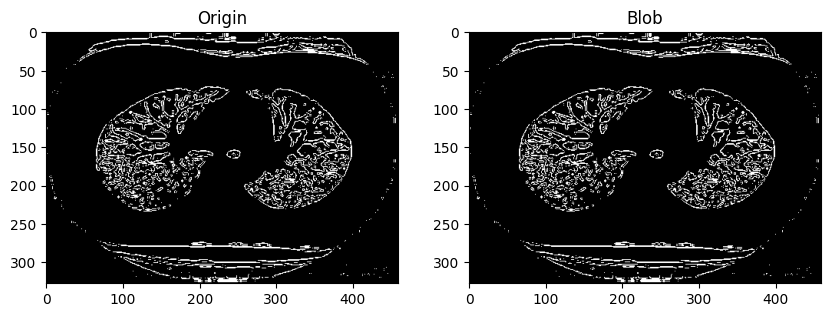

In [100]:
blob_detection(edges)

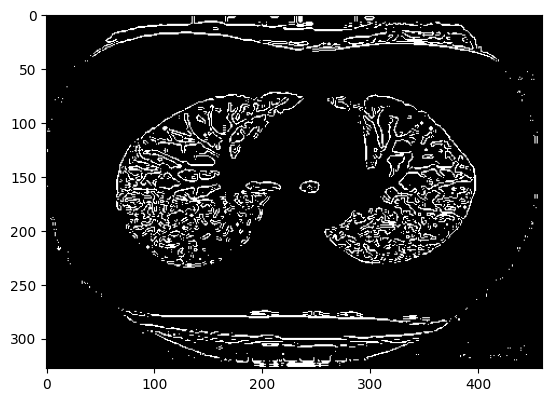

In [70]:
dimg_circles = apply_hough_transform(edges, minRadius=30)

plt.imshow(img_circles, cmap = "gray")

### Cancerous examples

In [ ]:
img_A = cv2.imread("/content/drive/MyDrive/W281/FinalProject/Data_Cropped_and_Resized/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/ad22.png", cv2.IMREAD_GRAYSCALE)
img_A = cv2.equalizeHist(img_A)

## LUNGS
show_slice_window(img_A, -600, 1500)

In [ ]:
img_A2 = cv2.imread("/content/drive/MyDrive/W281/FinalProject/Data_Cropped_and_Resized/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000122.png", cv2.IMREAD_GRAYSCALE)
img_A 2= cv2.equalizeHist(img_A2)

show_slice_window(img_A2, -600, 1500)

In [ ]:
img_S = cv2.imread("/content/drive/MyDrive/W281/FinalProject/Data_Cropped_and_Resized/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/sq6.png", cv2.IMREAD_GRAYSCALE)
# img_S = cv2.equalizeHist(img_S)

show_slice_window(img_S, -600, 1500)